In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.DataFrame(pd.read_csv('Thyroid_Diff.csv'))

In [40]:
df.sample(5, random_state = 42)

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Response,Recurred
268,32,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
250,30,F,No,No,No,Subclinical Hypothyroidism,Normal,Right,Follicular,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
318,30,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
331,51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Follicular,Uni-Focal,Intermediate,T3a,N0,M0,I,Structural Incomplete,Yes
56,43,F,No,Yes,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No


#### Entendiendo Nuestros Datos ####

Age: 
Representa la edad del sujeto

Gender: 
Indica el genero del sujeto (F o M)

Smoking: 
Un posible atributo a que si el sujeto investigado fuma o no (Yes o No)

Smoking History: S
i el individuo ha fumado antiguamente (Yes o No)

Radiotherapy History: 
Indica si el sujeto fue expuerto a una Terapia de radiación (Yes or No)

Thyroid Function:  
Indica la funcion de la Glandula Tiroide;
- Euthyroid --> normal thyroid function
- Clinical Hyperthyroidism  --> thyroid gland puts too much of those thyroid hormones into the bloodstream
- Subclinical Hypothyroidism --> peripheral thyroid hormone levels are within normal reference laboratory range but serum thyroid-stimulating hormone (TSH) levels are mildly elevated
- Clinical Hypothyroidism --> hyroid-stimulating hormone (TSH) concentrations above the reference range and free thyroxine concentrations below the reference range
- Subclinical Hyperthyroidism --> circulating thyrotropin (thyroid-stimulating hormone; TSH) levels below the reference range and normal serum thyroid hormone levels 

Physical Examination:
Describe los resultados de la examinacion de la Glandula Tiroide.
(Physical Examination, Single nodular goiter-right,Multinodular goiter, Single nodular goiter-left, Normal, Diffuse goite)

Adenopathy:
Inidica la presencia y ubicacion de la Adenopatía.
(No, Right, Bilateral, Left, Extensive, Posterior)      

Pathology:
Describre los tipos de Cancer de Tirode en base a los examenes de patologia.
(Papillary, Micropapillary, Follicular, Hurthel cell)

Focality: 
Indica si el cancer es Uni-Focal o Multi-Focal

Risk:
Representa el riesgo asociado al cancer
(Low, Intermediate, High) 

Tumor:
Representa la etapa del tumor del cancer de tiroide, indicando el tamaño y esparcion del tumor principal.
(T2, T3a, T1a, T1b, T4a, T3b, T4b)

Lymph Nodes:
Representa la etapa del ganglio linfático en el cancer, indicando la intervecion de ganglios cercanos.
(N0, N1b, N1a)

Cancer Metastasis:
Representa la fase de Metastasis del cancer, indicado si el cancer se esparcio a distintos organos.
(M0, M1)

Stage:
Representa la fase general del cancer de tiroide, combinado las tres etapas de arriba,
(I, II, IVB, III, IVA)

Response:
Describe su respuestas al tratamiento.
(Excellent, Structural Incomplete, Indeterminate, Biochemical Incomplete)

Recurred:
Indica si el cáncer de tiroides ha recurrido (Yes o No).

In [66]:
df['Response'].value_counts()

Response
Excellent                 208
Structural Incomplete      91
Indeterminate              60
Biochemical Incomplete     23
Name: count, dtype: int64

#### Data Cleaning 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [19]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [20]:
df.shape

(383, 17)

In [34]:
df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis'}, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Smoking History       383 non-null    object
 4   Radiotherapy History  383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  Tumor                 383 non-null    object
 12  Lymph Nodes           383 non-null    object
 13  Cancer Metastasis     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

### EDA ###

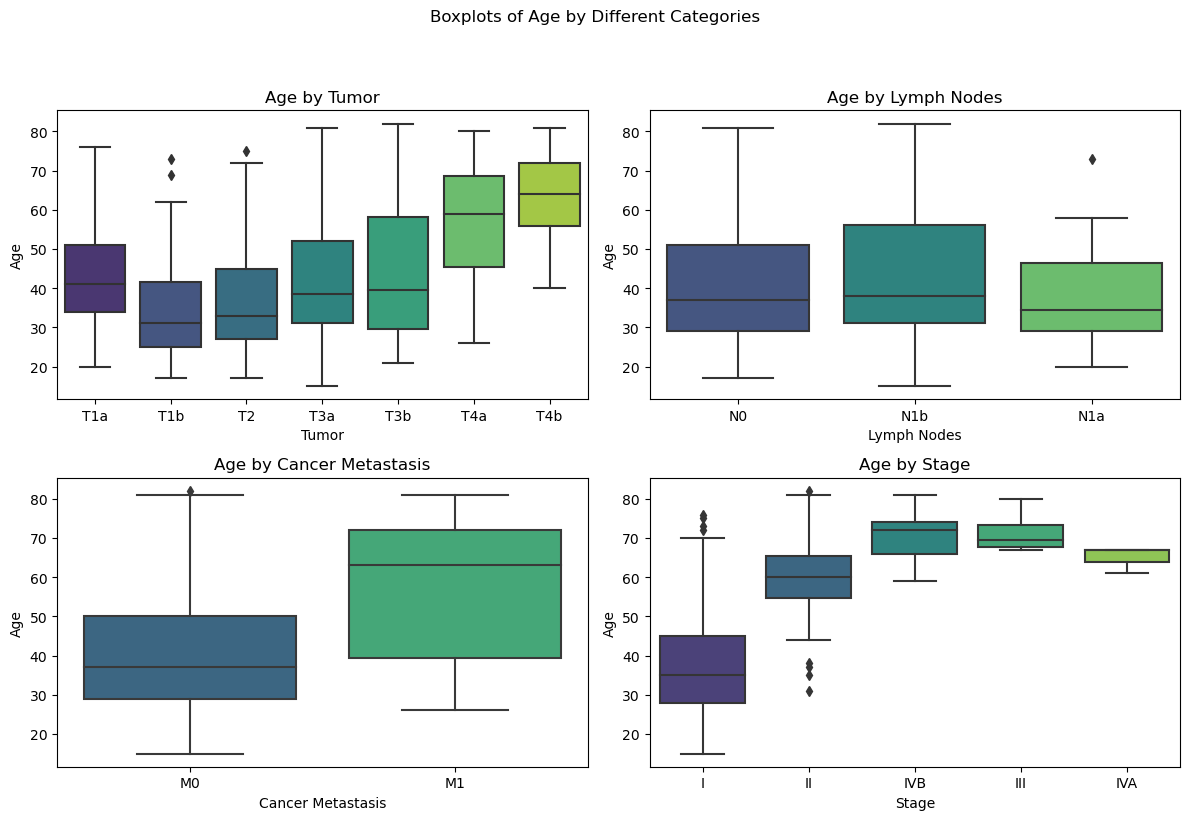

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Boxplots of Age by Different Categories')

# Boxplot for Age by Tumor
sns.boxplot(ax=axes[0, 0], x='Tumor', y='Age', data=df, palette='viridis')
axes[0, 0].set_title('Age by Tumor')

# Boxplot for Age by Lymph Nodes
sns.boxplot(ax=axes[0, 1], x='Lymph Nodes', y='Age', data=df, palette='viridis')
axes[0, 1].set_title('Age by Lymph Nodes')

# Boxplot for Age by Cancer Metastasis
sns.boxplot(ax=axes[1, 0], x='Cancer Metastasis', y='Age', data=df, palette='viridis')
axes[1, 0].set_title('Age by Cancer Metastasis')

# Boxplot for Age by Stage
sns.boxplot(ax=axes[1, 1], x='Stage', y='Age', data=df, palette='viridis')
axes[1, 1].set_title('Age by Stage')

# Remove the empty subplot in the last row and column
fig.delaxes(axes[2, 0])
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Age by tumor (T1a a T4b): Este gráfico muestra la distribución de las edades de los pacientes para diferentes etapas del tumor. La edad mediana parece variar entre las etapas, lo que sugiere que ciertas etapas del tumor pueden ser más comunes en ciertos grupos de edad. La presencia de valores atípicos en algunas etapas indica que hay pacientes significativamente más jóvenes o mayores que el paciente típico para esa etapa del tumor.

Age by Lymph Nodes (N0, N1b, N1a): Este gráfico muestra la distribución de edades para diferentes etapas de ganglios linfáticos. Al igual que con la etapa del tumor, la edad mediana varía entre las etapas. Esto podría sugerir una correlación entre la edad y la participación de los ganglios linfáticos.

Age by Cancer Metastasis (M0 y M1): Este gráfico compara la distribución de edades de pacientes sin metástasis (M0) y aquellos con metástasis (M1). Parece haber una clara distinción en la distribución de edades entre estos dos grupos, lo que podría sugerir que la edad es un factor en la metástasis del cáncer.

Age by Stagea (I a IV/A): Este gráfico muestra la distribución de edades para diferentes etapas generales del cáncer. La presencia de valores atípicos en las etapas I y II sugiere que estas etapas pueden ocurrir en un amplio rango de edades. La edad mediana parece aumentar con la etapa, lo que podría sugerir que las etapas más avanzadas del cáncer son más comunes en pacientes mayores.

C:\Users\agust\AppData\Local\Temp\ipykernel_21676\441336595.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\agust\AppData\Local\Temp\ipykernel_21676\441336595.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


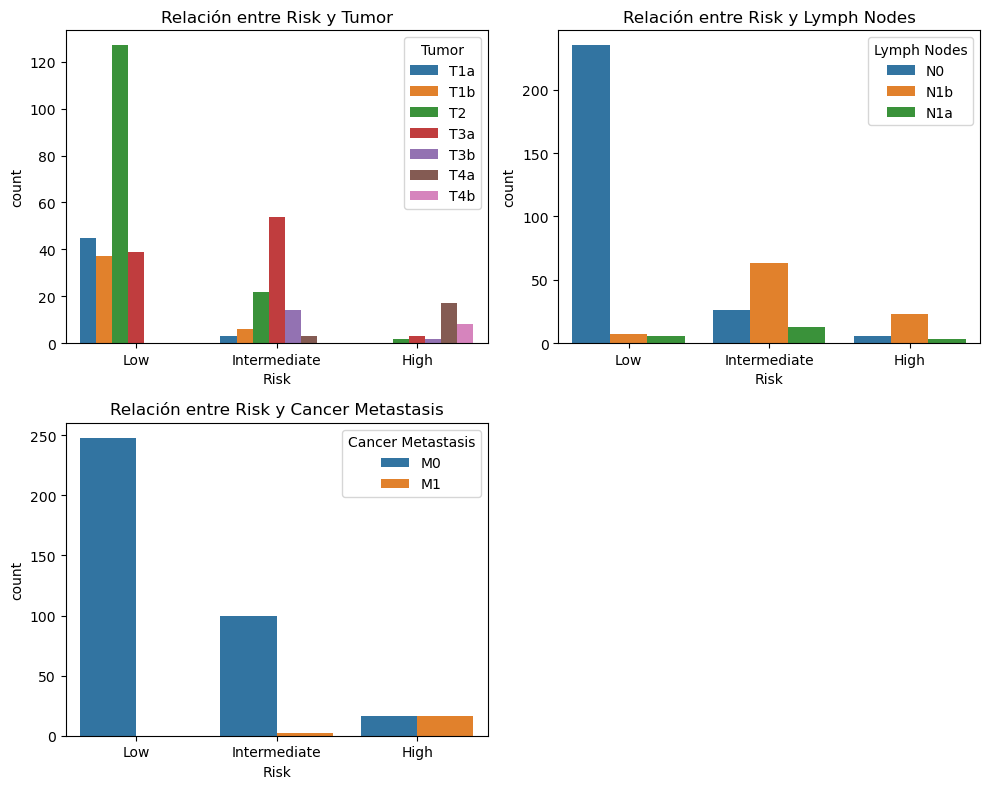

In [67]:
# Asumiendo que tu DataFrame se llama df
plt.figure(figsize=(10,8))

# Crear un gráfico de barras para 'Risk' y 'Tumor'
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Risk', hue='Tumor')
plt.title('Relación entre Risk y Tumor')
plt.tight_layout()

# Crear un gráfico de barras para 'Risk' y 'Lymph Nodes'
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Risk', hue='Lymph Nodes')
plt.title('Relación entre Risk y Lymph Nodes')
plt.tight_layout()

# Crear un gráfico de barras para 'Risk' y 'Cancer Metastasis'
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Risk', hue='Cancer Metastasis')
plt.title('Relación entre Risk y Cancer Metastasis')
plt.tight_layout()

plt.show()

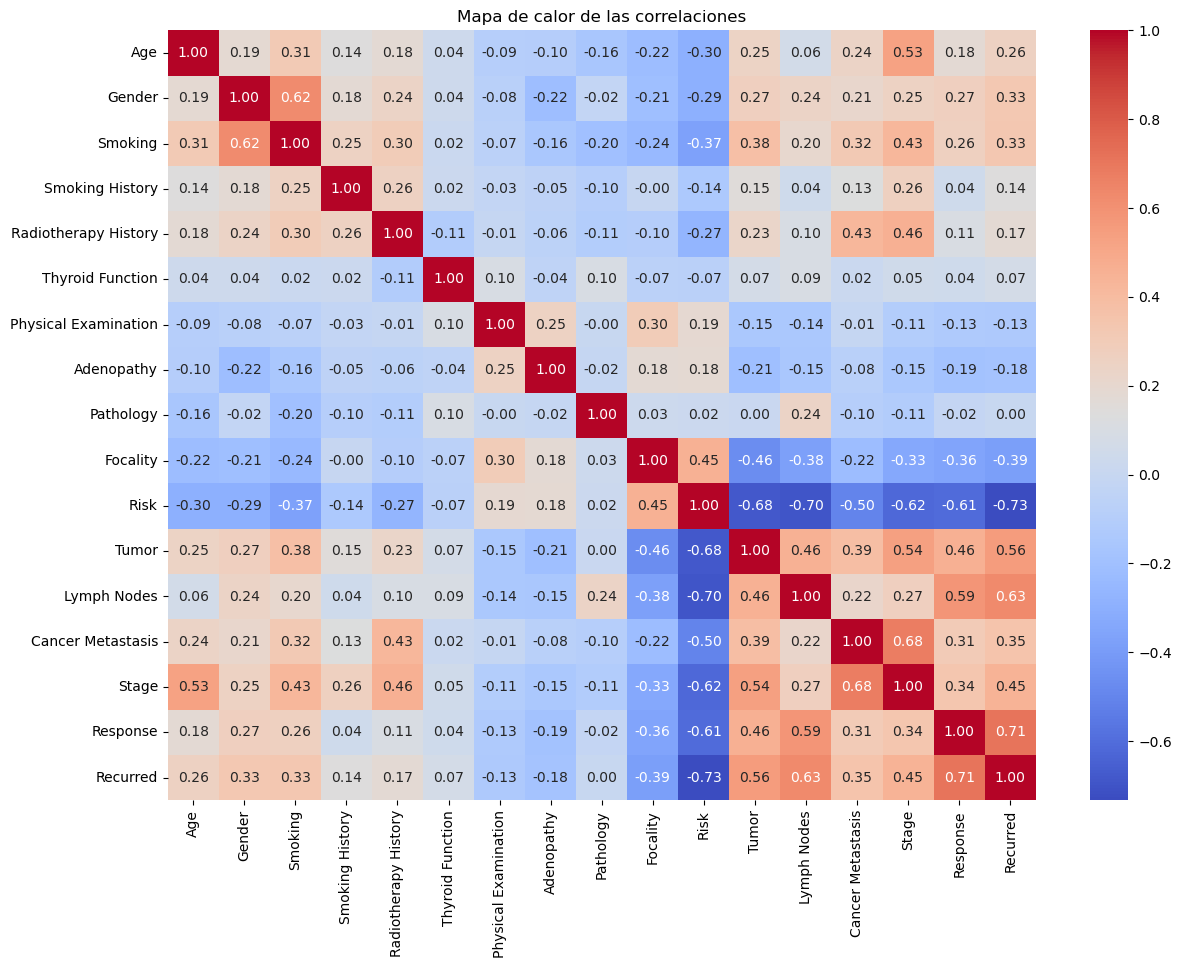

In [69]:
from sklearn.preprocessing import LabelEncoder

# Asumiendo que tu DataFrame se llama df
df_encoded = df.copy()

# Codificar las variables categóricas en números
le = LabelEncoder()
for column in df_encoded.columns:
    if df_encoded[column].dtype == type(object):
        df_encoded[column] = le.fit_transform(df_encoded[column])

# Calcular la matriz de correlación
corr = df_encoded.corr()

# Crear un mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de calor de las correlaciones')
plt.show()


### Heatmap ###
#### Creacion ####
Para poder realizar este heatmap, tuve que hacer uso a una funcion precreada de sklearn llamada LabelEncoder. Esta funcion codifica las variables categoricas (mayormente conocidas como valores discretos o no numericos) , y en base a eso genera una matriz asignandole a cada elemento un diferente peso dependiendo de lo determinante. Por ejemplo, si tienes una variable categórica con valores ‘Bajo’, ‘Medio’ y ‘Alto’, LabelEncoder podría asignarles los números 0, 1 y 2 respectivamente. Esto podría dar la impresión de que ‘Alto’ es dos veces ‘Medio’ y tres veces ‘Bajo’, lo cual no es necesariamente cierto.

#### ¿Qué nos dice el heatmap de arriba? ####
Existe correlaciones tanto fuertemente positivas y fuertemente negativas.
Estos nos sirver para saber como vamos a crear el modelo de prediccion, a que le vamos a dar mas peso.
Positivas Fuertes:
- Gender y Smoking tienen una correlacion de 0.62
- Response y recurred tienen una correlacion de 0.71
- Stage y Cancer M tienen una relacion de 0.68

Negaticas Fuertes:
- Risk y Recurred tienen una correlacion de - 0.71
- Risk y Lymph Nodes tienen una correlacion de - 0.62
- Risk y Tumor tienen una correlacion de - 0.68

Son cosas que en la cabeza parecen obvias pero no perdemos nada dandonos una ayudita visual

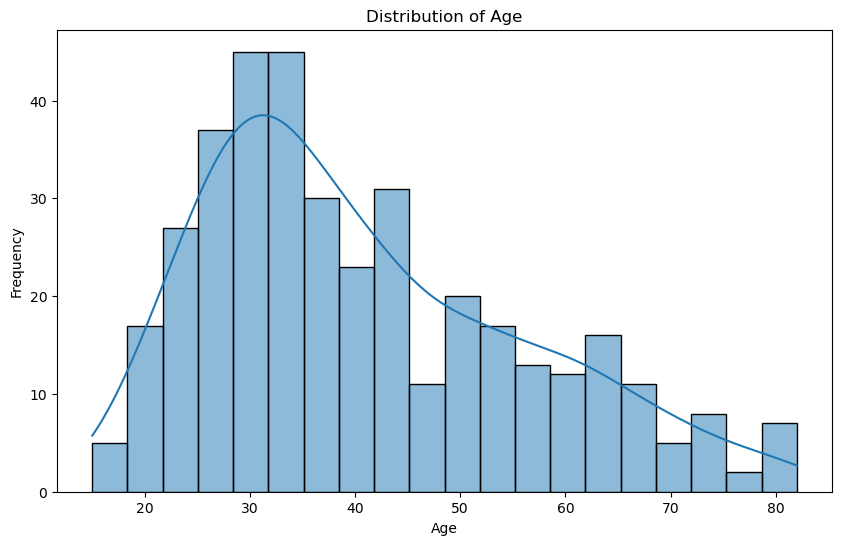

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

#### Vemos una distrubucion que tiende a ser normal, donde la mayoria de los paciente tienen dentre 30 a 35 años ####

### Preprocesamiento de Datos ###

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   382 non-null    int64 
 1   Gender                382 non-null    object
 2   Smoking               382 non-null    object
 3   Smoking History       382 non-null    object
 4   Radiotherapy History  382 non-null    object
 5   Thyroid Function      382 non-null    object
 6   Physical Examination  382 non-null    object
 7   Adenopathy            382 non-null    object
 8   Pathology             382 non-null    object
 9   Focality              382 non-null    object
 10  Risk                  382 non-null    object
 11  Tumor                 382 non-null    object
 12  Lymph Nodes           382 non-null    object
 13  Cancer Metastasis     382 non-null    object
 14  Stage                 382 non-null    object
 15  Response              382 non-null    object


In [73]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   382 non-null    int64
 1   Gender                382 non-null    int32
 2   Smoking               382 non-null    int32
 3   Smoking History       382 non-null    int32
 4   Radiotherapy History  382 non-null    int32
 5   Thyroid Function      382 non-null    int32
 6   Physical Examination  382 non-null    int32
 7   Adenopathy            382 non-null    int32
 8   Pathology             382 non-null    int32
 9   Focality              382 non-null    int32
 10  Risk                  382 non-null    int32
 11  Tumor                 382 non-null    int32
 12  Lymph Nodes           382 non-null    int32
 13  Cancer Metastasis     382 non-null    int32
 14  Stage                 382 non-null    int32
 15  Response              382 non-null    int32
 16  Recurred     

In [74]:
X = df_encoded.iloc[:,:-1]    #Input Features
Y = df_encoded.iloc[:,-1]     #Target

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Probemos el sistema en varios algoritmosde Machine Learning ###

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, roc_auc_score, mean_squared_error, accuracy_score, classification_report, roc_curve, confusion_matrix, precision_score

Classification Report: Regresion Logistica
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        58
           1       0.94      0.84      0.89        19

    accuracy                           0.95        77
   macro avg       0.95      0.91      0.93        77
weighted avg       0.95      0.95      0.95        77

ROC_AUC_SCORE is 0.912431941923775


C:\Users\agust\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


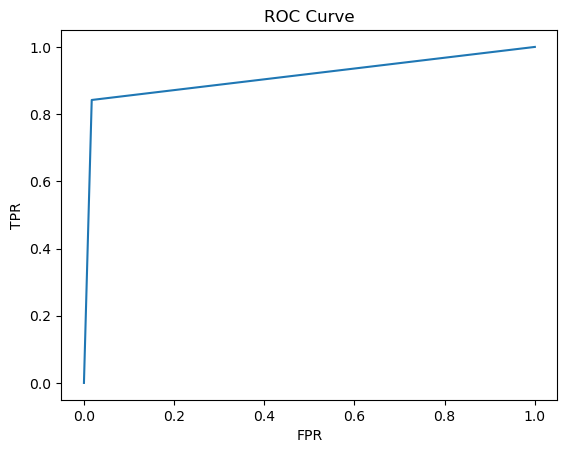

C:\Users\agust\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\agust\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.97      0.53      0.69        58
           1       0.40      0.95      0.56        19

    accuracy                           0.64        77
   macro avg       0.68      0.74      0.63        77
weighted avg       0.83      0.64      0.66        77

ROC_AUC_SCORE is 0.7409255898366607


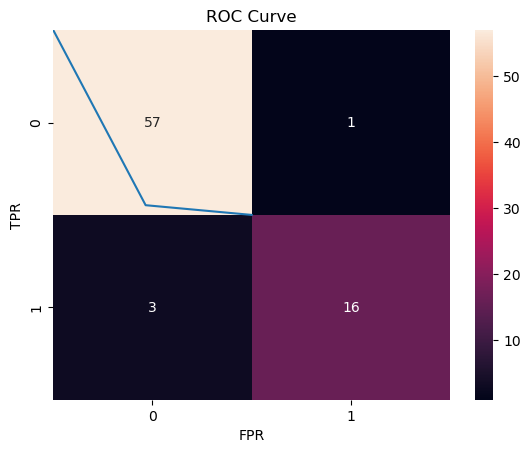

Classification Report: Decision Trees
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        58
           1       0.72      0.95      0.82        19

    accuracy                           0.90        77
   macro avg       0.85      0.91      0.87        77
weighted avg       0.92      0.90      0.90        77

ROC_AUC_SCORE is 0.9133393829401089


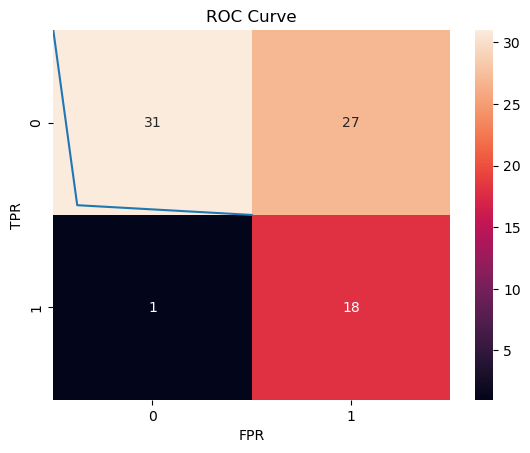

Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        58
           1       0.94      0.84      0.89        19

    accuracy                           0.95        77
   macro avg       0.95      0.91      0.93        77
weighted avg       0.95      0.95      0.95        77

ROC_AUC_SCORE is 0.912431941923775


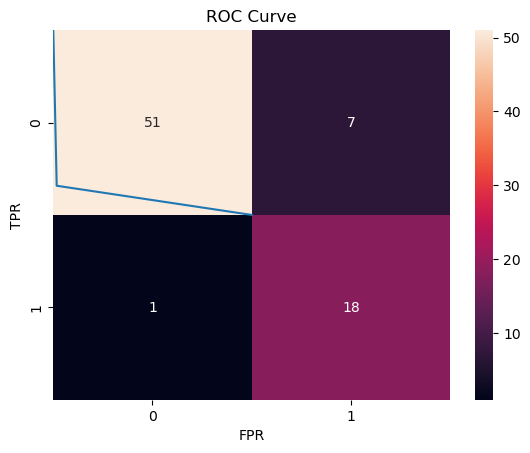

Classification Report: Naive Bayes
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        58
           1       0.75      0.63      0.69        19

    accuracy                           0.86        77
   macro avg       0.82      0.78      0.80        77
weighted avg       0.85      0.86      0.85        77

ROC_AUC_SCORE is 0.7813067150635208


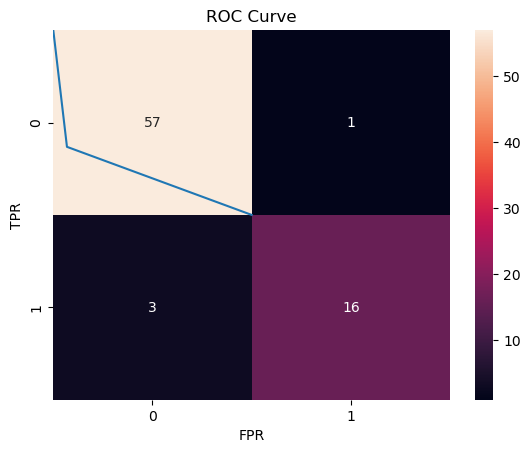

Classification Report: Xgboost
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        58
           1       0.90      0.95      0.92        19

    accuracy                           0.96        77
   macro avg       0.94      0.96      0.95        77
weighted avg       0.96      0.96      0.96        77

ROC_AUC_SCORE is 0.9564428312159708


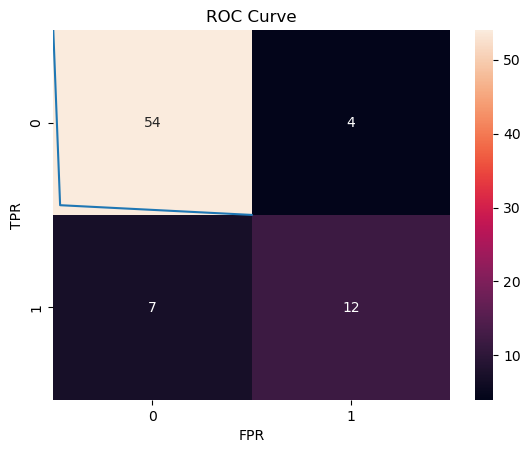

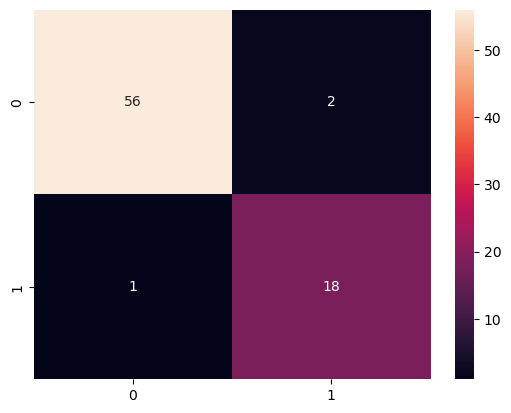

In [97]:
models = {}

#Regresion Logistica
models['Regresion Logistica'] = LogisticRegression()

#SVM
models['Support Vector Machines'] = LinearSVC()

#Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

#Random Forest
models['Random Forest'] = RandomForestClassifier()

#Naive Bayes
models['Naive Bayes'] = GaussianNB()


#XGBoost
models['Xgboost'] = XGBClassifier()

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    #Fit the classifier model
    models[key].fit(X_train, Y_train)
    
    #Predictions
    predictions = models[key].predict(X_val)
    
    #Calculate Accuracy, Precicsion, Recall
    accuracy[key] = accuracy_score(predictions, Y_val)
    precision[key] = precision_score(predictions, Y_val)
    recall[key] = recall_score(predictions, Y_val)
    Y_predict = models[key].predict(X_val)
    
    auc = roc_auc_score(Y_val, Y_predict)
    print('Classification Report:', key)
    print(classification_report(Y_val, predictions))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_val, predictions)
    print('ROC_AUC_SCORE is', roc_auc_score(Y_val, predictions))
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.show()
    sns.heatmap(confusion_matrix(Y_val, predictions), fmt = '', annot = True)
    

### Fijemosno la precision, recall y accuracy de cada modelo creado ###

In [101]:
df_model = pd.DataFrame(index=models.keys(), columns = ['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model

,Accuracy,Precision,Recall
Regresion Logistica,0.948052,0.842105,0.941176
Support Vector Machines,0.636364,0.947368,0.400000
Decision Trees,0.896104,0.947368,0.720000
Random Forest,0.948052,0.842105,0.941176
Naive Bayes,0.857143,0.631579,0.750000
Xgboost,0.961039,0.947368,0.900000


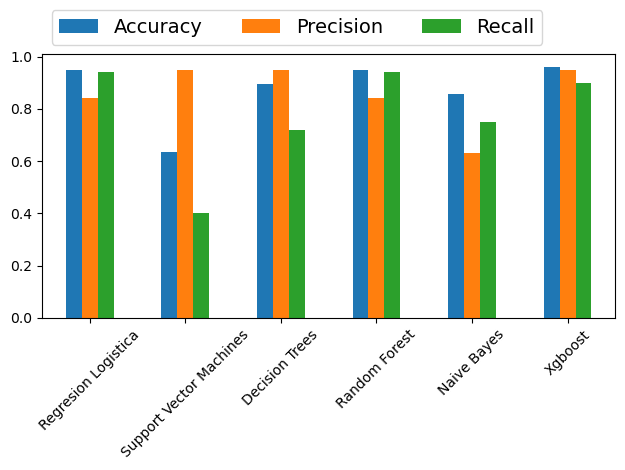

In [105]:
ax = df_model.plot.bar(rot=45)
ax.legend(ncol=len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()